In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import load_diabetes
from altair import Chart

# Functions

In [2]:
def update_weights(weights, X, y):
    alpha = 0.4
    
    y_est = 1 / (1 + np.exp(-np.dot(weights, X))) #Sigmoid
    step = alpha * (y - y_est) * X
    updated_weights = weights + step
    
    likelihood = y*np.dot(weights, X) - np.log(1+np.exp(np.dot(weights, X)))
    
    return updated_weights, likelihood                        

# Stochastic Gradient Descent

In [3]:
X_train, y_train = load_diabetes(return_X_y=True)

weights = np.ones(X_train.shape[1])
ws = np.zeros(X_train.shape)
likelihoods = []

for i in range(X_train.shape[0]):
    weights, likelihood = update_weights(weights, X_train[i], y_train[i])
    ws[i,:] = weights
    likelihoods.append(likelihood)

# Final Result

In [4]:
data = pd.DataFrame(likelihoods)
data[1] = data.index
data.columns = ['Likelihood', 'Round']

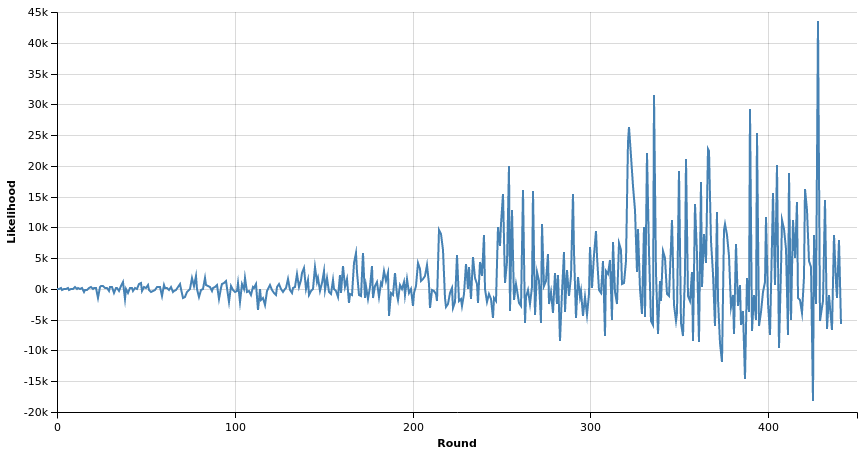

In [5]:
chart = Chart(data).mark_line().encode(x='Round:Q', y='Likelihood:Q')
chart.configure_cell(height=400, width=800)